In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy as ccEnLo
from tensorflow.keras.metrics import CategoricalCrossentropy as ccEnMe

from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train.shape, y_train.shape # ((60000, 28, 28), (60000,))
# X_test.shape, y_test.shape # ((10000, 28, 28), (10000,))

In [3]:
X_train = X_train.reshape(60000, -1)
y_train = to_categorical(y_train)

X_test = X_test.reshape(10000, -1)
y_test = to_categorical(y_test)

X_train , X_test = X_train/255.0 , X_test/255.0

In [4]:
model = Sequential([
    Dense(units = 256, input_shape = (784,), activation = 'relu'),
    Dropout(0.4, seed = 666),
    Dense(units = 128, activation = 'relu'),
    Dropout(0.3, seed = 666),
    Dense(units = 10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(
    optimizer = Adam(learning_rate = 0.01),
    loss = ccEnLo(),
    metrics = [ccEnMe()], 
)

In [6]:
history = model.fit(
    X_train, y_train,
    epochs = 33,
    validation_split = 0.2,
    use_multiprocessing = True,
    verbose = 1
)

Epoch 1/33
1500/1500 [==============================] - 14s 9ms/step - loss: 0.6805 - categorical_crossentropy: 0.6805 - val_loss: 0.2612 - val_categorical_crossentropy: 0.2612
Epoch 2/33
1500/1500 [==============================] - 18s 12ms/step - loss: 0.4926 - categorical_crossentropy: 0.4926 - val_loss: 0.2566 - val_categorical_crossentropy: 0.2566
Epoch 3/33
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4665 - categorical_crossentropy: 0.4665 - val_loss: 0.2448 - val_categorical_crossentropy: 0.2448
Epoch 4/33
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4603 - categorical_crossentropy: 0.4603 - val_loss: 0.2273 - val_categorical_crossentropy: 0.2273
Epoch 5/33
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4525 - categorical_crossentropy: 0.4525 - val_loss: 0.2411 - val_categorical_crossentropy: 0.2411
Epoch 6/33
1500/1500 [==============================] - 18s 12ms/step - loss: 0.4378 - categorical_crossentropy: 0

In [7]:
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.1934 - categorical_crossentropy: 0.1934


[0.19340671598911285, 0.19340671598911285]

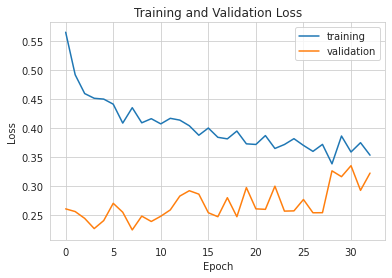

In [8]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

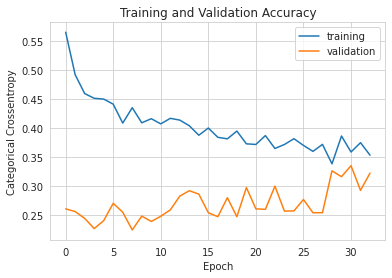

In [9]:
plt.plot(history.history['categorical_crossentropy'], label='training')
plt.plot(history.history['val_categorical_crossentropy'], label='validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Categorical Crossentropy')
plt.legend()
plt.show()

In [10]:
test_set_score = model.evaluate(X_test, y_test, verbose=1)
print("Test set loss:", test_set_score[0])
print("Test set categorical cross entropy:", test_set_score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.3399 - categorical_crossentropy: 0.3399
Test set loss: 0.33988699316978455
Test set categorical cross entropy: 0.33988699316978455
